<a href="https://colab.research.google.com/github/diegomarlop/LAB_IRONHACK/blob/main/Lab7_01_7_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab | Revisiting Machine Learning Case Study


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.set_option('display.max_columns',None)
import warnings 
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('learningSet.txt')

In [ ]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [ ]:
data.shape

(95412, 481)

In [ ]:
#Complete the following steps on the categorical columns in the dataset:

#Check for null values in all the columns

In [153]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [156]:
categoricals.shape

(95412, 74)

In [ ]:
categoricals.info()

In [155]:
#Exclude the following variables by looking at the definitions. 
#Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

#OSOURCE - symbol definitions not provided, too many categories
#ZIP CODE - we are including state already

drop_list = list()
drop_list

[]

In [162]:
##identify columns that over 85% missing values
nulls_pernentage = pd.DataFrame(categoricals.isna().sum()/len(categoricals)).reset_index()
nulls_pernentage.columns = ['column_name','%nulls']

In [163]:
nulls_pernentage

,column_name,%nulls
0,OSOURCE,0.009726
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.985337
4,PVASTATE,0.984719
...,...,...
69,RFA_2A,0.000000
70,MDMAUD_R,0.000000
71,MDMAUD_F,0.000000
72,MDMAUD_A,0.000000


In [159]:
#replace 
for i in categoricals:
  categoricals[i] = categoricals[i].replace(' ',np.NaN)

In [164]:
#Remove those columns from the dataframe
columns_drop = nulls_pernentage[nulls_pernentage['%nulls']>0.85]
print(len(columns_drop))
columns_drop

30


,column_name,%nulls
3,MAILCODE,0.985337
4,PVASTATE,0.984719
6,RECINHSE,0.929747
7,RECP3,0.978860
8,RECPGVG,0.998805
9,RECSWEEP,0.983052
15,CHILD03,0.987989
16,CHILD07,0.983587
17,CHILD12,0.981019
18,CHILD18,0.970161


In [165]:
drop_list = list(columns_drop['column_name'])

In [ ]:
drop_list

In [167]:
categoricals= categoricals.drop(columns = drop_list)

In [173]:
categoricals.head()

,OSOURCE,STATE,ZIP,NOEXCH,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,GEOCODE,PETS,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,0,XXXX,T2,36,NaN,NaN,F,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,0,XXXX,S1,14,E,H,M,3,2,NaN,NaN,NaN,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,AMH,NC,27017,0,XXXX,R2,43,NaN,U,M,3,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,NaN,S4F,S4F,S4F,S4F,S4F,S4F,NaN,S4D,S4D,NaN,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,0,XXXX,R2,44,E,U,F,3,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,NaN,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,NaN,FL,33176,0,XXXX,S2,16,E,H,F,3,NaN,NaN,3,NaN,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,NaN,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [175]:
#Reduce the number of categories in the column GENDER. 
#The column should only have either "M" for males, "F" for females, and "other" for all the rest

#Note that there are a few null values in the column. We will first replace those null values using the code below:
print(categoricals['GENDER'].value_counts())
categoricals['GENDER'] = categoricals['GENDER'].fillna('F')

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


In [176]:
categoricals['GENDER']=categoricals['GENDER'].apply(lambda x: 'other' if x in ['',' ' ,'U', 'C', 'J', 'A'] else x)
categoricals['GENDER'].value_counts()

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

#Lab | Feature engineering

In [177]:
#Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.
#Check for null values in the numerical columns.
numericals = data.select_dtypes(np.number)
numericals.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0

In [137]:
numericals.shape

(95412, 407)

In [70]:
nulls_columns = pd.DataFrame(numericals.isna().sum()/len(numericals)).reset_index()
nulls_columns.columns = ['column_name','%nulls']
nulls_columns

,column_name,%nulls
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
402,TARGET_B,0.000000
403,TARGET_D,0.000000
404,HPHONE_D,0.000000
405,RFA_2F,0.000000


In [71]:
#we drop columns with 50% or more that contains nulls 
new_columns = nulls_columns[nulls_columns['%nulls']>0.2]
new_columns.reset_index(drop=True)

,column_name,%nulls
0,AGE,0.248030
1,NUMCHLD,0.870184
2,INCOME,0.223096
3,WEALTH1,0.468830
4,MBCRAFT,0.553955
...,...,...
71,RAMNT_20,0.917327
72,RAMNT_21,0.900296
73,RAMNT_22,0.781233
74,RAMNT_23,0.917631


In [179]:
drop_list_num = []

In [181]:
drop_list_num = list(new_columns['column_name'])

In [ ]:
drop_list_num

In [183]:
drop_list_num.remove('INCOME')

In [184]:
numericals = numericals.drop(columns=drop_list_num)
numericals.head()

,ODATEDW,TCODE,DOB,INCOME,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,NaN,0,0,39,34,18,10,2,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,6.0,16,0,15,55,11,6,2,1,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,3.0,2,0,20,29,33,6,8,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3

In [185]:
numericals.shape

(95412, 332)

In [ ]:
#Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
print(categoricals['GEOCODE2'].value_counts(dropna=False))

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64


In [ ]:
categoricals['GEOCODE2'] = categoricals['GEOCODE2'].replace(' ',np.nan)

In [ ]:
import statistics
categoricals['GEOCODE2'] = categoricals['GEOCODE2'].fillna(statistics.mode(categoricals['GEOCODE2']))

In [ ]:
print(categoricals['GEOCODE2'].value_counts(dropna=False))

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64


In [ ]:
#Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
print(numericals['WEALTH1'].value_counts(dropna=False))

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64


In [ ]:
drop_list_num.append('WEALTH1')

In [ ]:
numericals = numericals.drop(columns=drop_list_num)
numericals.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9503.0,9502.0,9501.0,9411.0,9410.0,9409.0,9406.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9509.0,NaN,NaN,9503.0,NaN,NaN,9411.0,9410.0,9409.0,9406.0,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18

In [ ]:
print(numericals['ADI'].value_counts(dropna=False))
print(numericals['DMA'].value_counts(dropna=False))
print(numericals['MSA'].value_counts(dropna=False))

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64
803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64


In [ ]:
#Use appropriate EDA technique where ever necessary.

In [ ]:
numericals.head()

In [199]:
import statistics
numericals['INCOME'] = numericals['INCOME'].fillna(np.mean(numericals['INCOME']))

In [200]:
numericals['INCOME'].unique()

array([3.88624774, 6.        , 3.        , 1.        , 4.        ,
       2.        , 7.        , 5.        ])

In [ ]:
categoricals.head()

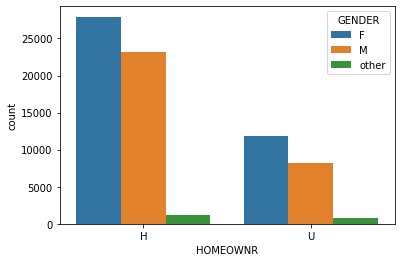

In [195]:
sns.countplot(categoricals['HOMEOWNR'],hue=categoricals['GENDER'])

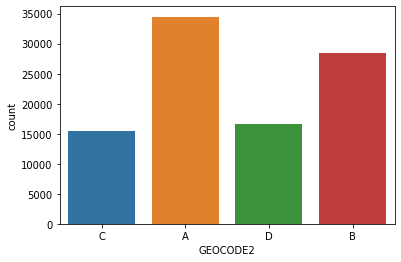

In [194]:
sns.countplot(categoricals['GEOCODE2'])

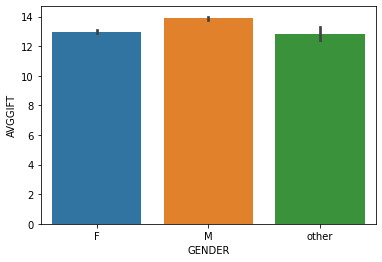

In [201]:
sns.barplot(data=numericals, x=categoricals['GENDER'],y='AVGGIFT')

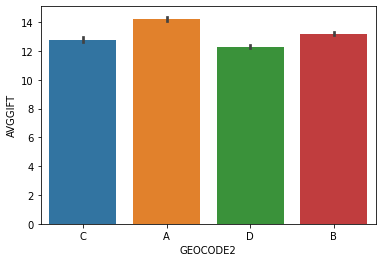

In [202]:
sns.barplot(data=numericals, x=categoricals['GEOCODE2'],y='AVGGIFT')

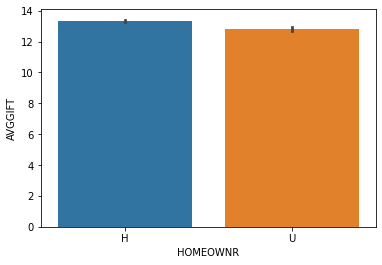

In [203]:
sns.barplot(data=numericals, x=categoricals['HOMEOWNR'],y='AVGGIFT')

In [204]:
data_limpia = pd.concat([numericals,categoricals],axis=1)
data_limpia.head()

,ODATEDW,TCODE,DOB,INCOME,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2,OSOURCE,STATE,ZIP,NOEXCH,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,GEOCODE,PETS,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,8901,0,3712,3.886248,0,0,39,34,18,10,2,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0,GRI,IL,61081,0,XXXX,T2,36,NaN,NaN,F,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,9401,1,5202,6.000000,16,0,15,55,11,6,2,1,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,

In [206]:
data_limpia.shape

(95412, 376)

In [ ]:
"""
Data field | Description |
--- | ---|
`ODATEDW `  | Origin Date. Date of donor's first gift to the PVA `YYMM` format (Year/Month). 
`OSOURCE` | Origin Source <br /> - Only 1rst 3 bytes are used <br /> - Defaulted to 00000 for conversion <br /> - Code indicating which mailing list the donor was originally acquired from <br />- A nominal or symbolic field. 
`TCODE ` | Donor title code <br /> 000=_ <br /> 001=MR. <br /> 001001 = MESSRS. <br /> 001002=MR. & MRS. <br /> 002=MRS. <br /> 002002=MESDAMES <br /> 003=MISS <br /> 003003=MISSES <br /> 004=DR.<br /> 004002=DR. & MRS. <br /> 004004=DOCTORS <br /> 005=MADAME <br /> 006=SERGEANT <br /> 009=RABBI <br /> 010=PROFESSOR <br /> 010002=PROFESSOR & MRS. <br /> 010010=PROFESSORS <br />  011=ADMIRAL <br />  011002=ADMIRAL & MRS. <br />  012=GENERAL <br />  012002=GENERAL & MRS. <br />  013=COLONEL <br />  013002=COLONEL & MRS. <br />  014=CAPTAIN <br />  014002=CAPTAIN & MRS. <br />  015=COMMANDER <br />  015002=COMMANDER & MRS. <br />  016=DEAN <br /> 017=JUDGE <br />  017002=JUDGE & MRS. <br /> 018=MAJOR <br />  018002=MAJOR & MRS. <br /> 019=SENATOR <br /> 020=GOVERNOR <br /> 021002=SERGEANT & MRS. <br />  022002=COLNEL & MRS. <br />  024=LIEUTENANT <br />  026=MONSIGNOR <br /> 027=REVEREND <br /> 028=MS. <br /> 028028=MSS. <br /> 029=BISHOP <br /> 031=AMBASSADOR <br /> 031002=AMBASSADOR & MRS.  <br /> 033=CANTOR <br /> 036=BROTHER <br /> 037=SIR <br /> 038=COMMODORE <br /> 040=FATHER <br /> 042=SISTER <br /> 043=PRESIDENT <br /> 044=MASTER <br /> 046=MOTHER <br /> 047=CHAPLAIN <br /> 048=CORPORAL <br /> 050=ELDER <br /> 056=MAYOR <br /> 059002=LIEUTENANT & MRS. <br /> 062=LORD <br /> 063=CARDINAL <br /> 064=FRIEND <br /> 065=FRIENDS <br /> 068=ARCHDEACON <br /> 069=CANON <br /> 070=BISHOP <br /> 072002=REVEREND & MRS. <br /> 073=PASTOR <br /> 075=ARCHBISHOP <br /> 085=SPECIALIST <br /> 087=PRIVATE <br /> 089=SEAMAN <br /> 090=AIRMAN <br /> 091=JUSTICE <br /> 092=MR. JUSTICE <br /> 100=M. <br /> 103=MLLE. <br /> 104=CHANCELLOR<br /> 106=REPRESENTATIVE<br /> 107=SECRETARY<br /> 108=LT. GOVERNOR<br /> 109=LIC.<br /> 111=SA.<br /> 114=DA.<br /> 116=SR.<br /> 117=SRA.<br /> 118=SRTA.<br /> 120=YOUR MAJESTY<br /> 122=HIS HIGHNESS<br /> 123=HER HIGHNESS<br /> 124=COUNT<br /> 125=LADY<br /> 126=PRINCE<br /> 127=PRINCESS<br /> 128=CHIEF<br /> 129=BARON<br /> 130=SHEIK<br /> 131=PRINCE AND PRINCESS<br /> 132=YOUR IMPERIAL MAJEST<br /> 135=M. ET MME.<br /> 210=PROF.
`STATE` | State abbreviation (a nominal/symbolic field)
`ZIP` | Zipcode (a nominal/symbolic field)
`MAILCODE` | Mail Code <br /> " "=Address is OK <br /> B=Bad Address
`PVASTATE` | EPVA State or PVA State <br /> Indicates whether the donor lives in a state <br /> served by the organization's EPVA chapter <br /> P=PVA State <br /> E=EPVA State (Northeastern US)
`DOB` | Date of birth (`YYMM`, Year/Month format)
`NOEXCH` | Do Not Exchange Flag (For list rental) <br /> _=can be exchanged <br /> X = do not exchange
`RECINHSE` | In House File Flag <br /> _=Not an In House Record <br /> X=Donor has given to PVA's In House program
`RECP3` | P3 File Flag <br /> _=Not a P3 Record <br /> X=Donor has given to PVA's P3 program
`RECPGVG` | Planned Giving File Flag <br /> _=Not a Planned Giving Record <br /> X=Planned Giving Record
`RECSWEEP` | Sweepstakes file flag <br /> _=Not a Sweepstakes Record <br /> X=Sweepstakes Record
`MDMAUD` |  The Major Donor Matrix code <br /> The codes describe frequency and amount of giving for donors who have given a $100+ gift at any time in their giving history. <br /> An RFA (recency/frequency/monetary) field. <br /> The (current) concatenated version is a nominal or symbolic field. The individual bytes could separately be used as fields and refer to the following: <br /><br /> 1st byte: **Recency of Giving** <br /> &nbsp; C=Current Donor <br />  &nbsp; L=Lapsed Donor <br /> &nbsp; I=Inactive Donor <br /> &nbsp; D=Dormant Donor <br /><br /> 2nd byte: **Frequency of Giving** <br /> &nbsp; 1=One gift in the period of recency <br /> &nbsp; 2=Two-Four gifts in the period of recency <br /> &nbsp; 5=Five+ gifts in the period of recency <br /><br /> 3rd byte: **Amount of Giving** <br /> &nbsp; L=Less than $100(Low Dollar) <br /> &nbsp; C=$100-499(Core) <br /> &nbsp; M=$500-999(Major) <br /> &nbsp; T=$1,000+(Top) <br /> 4th byte: **Blank/meaningless/filler** <br /> 'X' indicates that the donor is not a major donor. <br /> For more information regarding the RFA codes, see the promotion history field definitions.
`DOMAIN` | DOMAIN/Cluster code. A nominal or symbolic field. <br /> could be broken down by bytes as explained below. <br /><br /> 1st byte = Urbanicity level of the donor's neighborhood <br /> &nbsp; U=Urban <br /> &nbsp; C=City <br /> &nbsp; S=Suburban <br /> &nbsp; T=Town <br /> &nbsp; R=Rural <br /><br /> 2nd byte = Socio-Economic status of the neighborhood <br />  &nbsp; 1=Highest SES <br />  &nbsp; 2=Average SES <br />  &nbsp; 3=Lowest SES (except for Urban communities, where: <br />  &nbsp;  &nbsp; 1=Highest SES, <br /> &nbsp;  &nbsp; 2=Above average SES, <br />  &nbsp;  &nbsp; 3=Below average SES, <br />  &nbsp;  &nbsp;  4=Lowest SES.) 
`CLUSTER` | Code indicating which cluster group the donor falls into. <br /> Each cluster is unique in terms of socio-economic status, urbanicty, ethnicity and a variety of other demographic characteristics. <br /> A nominal or symbolic field.
`AGE` |  Overlay Age <br /> 0=missing 
`AGEFLAG` | Age Flag <br /> E=Exact <br /> I=Inferred from Date of Birth Field
`HOMEOWNR` | Home Owner Flag <br /> H=Home owner <br /> U=Unknown
`CHILD03` | Presence of Children age 0-3 <br /> B=Both, F=Female, M=Male
`CHILD07` | Presence of Childern age 4-7
`CHILD12` | Presence of Childern age 8-12
`CHILD18` | Presence of Childern age 13-18
`NUMCHLD` | NUMBER OF CHILDREN
`INCOME` | HOUSEHOLD INCOME
`GENDER` | Gender <br /> M=Male <br /> F=Female <br /> U=Unknown <br /> J=Joint Account, unknown gender
`WEALTH1` | Wealth Rating
`HIT` | MOR Flag # HIT (Mail Order Response) <br /> Indicates total number of known times the donor has responded to a mail order offer other than PVA's.

The following variables indicate the number of known times the donor has responded to other types of mail order offers:


Data field | Description |
--- | ---|
`MBCRAFT` | Buy Craft Hobby
`MBGARDEN` | Buy Gardening
`MBBOOKS` | Buy Books
`MBCOLECT` | Buy Collectables
`MAGFAML` | Buy General Family Mags
`MAGFEM` | Buy Female Mags
`MAGMALE` | Buy Sports Mags
`PUBGARDN` | Gardening Pubs
`PUBCULIN` | Culinary Pubs
`PUBHLTH` | Health Pubs
`PUBDOITY` | Do It Yourself Pubs
`PUBNEWFN` | News / Finance Pubs
`PUBPHOTO` | Photography Pubs
`PUBOPP` | Opportunity Seekers Pubs
`DATASRCE` | Source of Overlay Data <br /> Indicates which third-party data source the donor matched against <br /> 1=MetroMail <br /> 2=Polk <br /> 3=Both
`MALEMILI` | % Males active in the `Military`
`MALEVET` | % Males Veterans
`VIETVETS` | % Vietnam Vets
`WWIIVETS` | % WWII Vets
`LOCALGOV` | % Employed by Local Gov
`STATEGOV` | % Employed by State Gov
`FEDGOV` | % Employed by Fed Gov
`SOLP3` | SOLICIT LIMITATION CODE P3 <br />  &nbsp; =can be mailed (Default) <br /> 00=Do Not Solicit or Mail <br /> 01=one solicitation per year <br /> 02=two solicitations per year <br /> 03=three solicitations per year <br /> 04=four solicitations per year <br /> 05=five solicitations per year <br /> 06=six solicitations per year <br /> 12=twelve solicitations per year
`SOLIH` | SOLICITATION LIMIT CODE IN HOUSE <br /> &nbsp; =can be mailed (Default) <br /> 00=Do Not Solicit <br /> 01=one solicitation per year <br /> 02=two solicitations per year <br /> 03=three solicitations per year <br /> 04=four solicitations per year <br /> 05=five solicitations per year <br /> 06=six solicitations per year <br /> 12=twelve solicitations per year
`MAJOR` | Major ($$) Donor Flag <br /> _=Not a Major Donor <br /> X=Major Donor
`WEALTH2` | Wealth Rating <br /> Wealth rating uses median family income and population statistics from each area to index relative wealth within each state. <br /> The segments are denoted 0-9, with 9 being the highest income group and zero being the lowest. Each rating has a different meaning within each state.
`GEOCODE` | Geo Cluster Code indicating the level geography at which a record matches the census data. A nominal or symbolic field. <br /> Blank=No code has been assigned or did not match at any level.

The following variables reflect donor interests, as collected from third-party data sources:


Data field | Description |
--- | ---|
`COLLECT1` | COLLECTABLE (Y/N)
`VETERANS` | VETERANS (Y/N)
`BIBLE` | BIBLE READING (Y/N)
`CATLG` | SHOP BY CATALOG (Y/N)
`HOMEE` | WORK FROM HOME (Y/N)
`PETS` | HOUSEHOLD PETS (Y/N)
`CDPLAY` | CD PLAYER OWNERS (Y/N)
`STEREO` | STEREO/RECORDS/TAPES/CD (Y/N)
`PCOWNERS` | HOME PC OWNERS/USERS
`PHOTO` | PHOTOGRAPHY (Y/N)
`CRAFTS` | CRAFTS (Y/N)
`FISHER` | FISHING (Y/N)
`GARDENIN` | GARDENING (Y/N)
`BOATS` | POWER BOATING (Y/N)
`WALKER` | WALK FOR HEALTH (Y/N)
`KIDSTUFF` | BUYS CHILDREN'S PRODUCTS (Y/N)
`CARDS` | STATIONARY/CARDS BUYER (Y/N)
`PLATES` | PLATE COLLECTOR (Y/N)
`LIFESRC` | LIFE STYLE DATA SOURCE <br /> Indicates source of the lifestyle variables listed above <br /> 1=MATCHED ON METRO MAIL ONLY <br /> 2=MATCHED ON POLK ONLY <br /> 3=MATCHED BOTH MM AND POLK
`PEPSTRFL` | Indicates PEP Star RFA Status <br /> blank=Not considered to be a PEP Star <br /> 'X'=Has PEP Star RFA Status


The following variables reflect characteristics of the donors neighborhood, as collected from the 1990 US Census:

Data field | Description |
--- | ---|
`POP901` | Number of Persons
`POP902` | Number of Families
`POP903`  | Number of Households
`POP90C1`  | Percent Population in Urbanized Area
`POP90C2` | Percent Population Outside Urbanized Area
`POP90C3` | Percent Population Inside Rural Area
`POP90C4` | Percent Male
`POP90C5` | Percent Female
`ETH1` | Percent White
`ETH2` | Percent Black
`ETH3` | Percent Native American
`ETH4` |Percent Pacific Islander/Asian
`ETH5` | Percent Hispanic
`ETH6` | Percent Asian Indian
`ETH7` | Percent Japanese
`ETH8` | Percent Chinese
`ETH9` | Percent Philipino
`ETH10` | Percent Korean
`ETH11` | Percent Vietnamese
`ETH12` | Percent Hawaiian
`ETH13` | Percent Mexican
`ETH14` | Percent Puerto Rican
`ETH15` | Percent Cuban
`ETH16` | Percent Other Hispanic
`AGE901` | Median Age of Population
`AGE902` | Median Age of Adults 18 or Older
`AGE903` | Median Age of Adults 25 or Older
`AGE904` | Average Age of Population
`AGE905` | Average Age of Adults >= 18
`AGE906` | Average Age of Adults >= 25
`AGE907` | Percent Population Under Age 18
`CHIL1` | Percent Children Under Age 7
`CHIL2` | Percent Children Age 7 - 13
`CHIL3` | Percent Children Age 14-17
`AGEC1` | Percent Adults Age18-24
`AGEC2` | Percent Adults Age 25-34
`AGEC3` | Percent Adults Age 35-44
`AGEC4` | Percent Adults Age 45-54
`AGEC5` | Percent Adults Age 55-64
`AGEC6` | Percent Adults Age 65-74
`AGEC7` | Percent Adults Age >= 75
`CHILC1` | Percent Children Age <=2
`CHILC2` | Percent Children Age 3-5
`CHILC3` | Percent Children Age 6-11
`CHILC4` | Percent Children Age 12-15
`CHILC5` | Percent Children Age 16-18
`HHAGE1` | Percent Households w/ Person 65+
`HHAGE2` | Percent Households w/ Person 65+ Living Alone
`HHAGE3` | Percent Households Headed by an Elderly Person Age 65+
`HHN1` | Percent 1 Person Households
`HHN2` | Percent 2 Person Households
`HHN3` | Percent 3 or More Person Households
`HHN4` | Percent 4 or More Person Households
`HHN5` | Percent 5 or More Person Households
`HHN6` | Percent 6 Person Households
`MARR1` | Percent Married
`MARR2` | Percent Separated or Divorced
`MARR3` | Percent Widowed
`MARR4` | Percent Never Married
`HHP1` | Median Person Per Household
`HHP2` | Average Person Per Household
`DW1` | Percent Single Unit Structure
`DW2` | Percent Detached Single Unit Structure
`DW3` | Percent Duplex Structure
`DW4` | Percent Multi (2+) Unit Structures
`DW5` | Percent 3+ Unit Structures
`DW6` | Percent Housing Units in 5+ Unit Structure
`DW7` | Percent Group Quarters
`DW8` | Percent Institutional Group Quarters
`DW9` | Non-Institutional Group Quarters
`HV1` | Median Home Value in hundreds
`HV2` | Average Home Value in hundreds
`HV3` | Median Contract Rent in hundreds
`HV4` | Average Contract Rent in hundreds
`HU1` | Percent Owner Occupied Housing Units
`HU2` | Percent Renter Occupied Housing Units
`HU3` | Percent Occupied Housing Units
`HU4` | Percent Vacant Housing Units
`HU5` | Percent Seasonal/Recreational Vacant Units
`HHD1` | Percent Households w/ Related Children
`HHD2` | Percent Households w/ Families
`HHD3` | Percent Married Couple Families
`HHD4` | Percent Married Couples w/ Related Children
`HHD5` | Percent Persons in Family Household
`HHD6` | Percent Persons in Non-Family Household
`HHD7` | Percent Single Parent Households
`HHD8` | Percent Male Householder w/ Child
`HHD9` | Percent Female Householder w/ Child
`HHD10` | Percent Single Male Householder
`HHD11` | Percent Single Female Householder
`HHD12` | Percent Households w/ Non-Family Living Arrangements
`ETHC1` | Percent White < Age 15
`ETHC2` | Percent White Age 15 - 59
`ETHC3` | Percent White Age 60+
`ETHC4` | Percent Black < Age 15
`ETHC5` | Percent Black Age 15 - 59
`ETHC6` | Percent Black Age 60+
`HVP1` | Percent Home Value >= $200,000
`HVP2` | Percent Home Value >= $150,000
`HVP3` | Percent Home Value >= $100,000
`HVP4` | Percent Home Value >= $75,000
`HVP5` | Percent Home Value >= $50,000
`HVP6` | Percent Home Value >= $300,000
`HUR1` | $ 1 or 2 Room Housing Units
`HUR2` | Percent >= 6 Room Housing Units
`RHP1` | Median Number of Rooms per Housing Unit
`RHP2` | Average Number of Rooms per Housing Unit
`RHP3` | Median Number of Persons per Housing Unit
`RHP4` | Average Number of Persons per Room
`HUPA1` | Percent Housing Units w/ 2 thru 9 Units at the Address
`HUPA2` | Percent Housing Units w/ >= 10 Units at the Address
`HUPA3` | Percent Mobile Homes or Trailers
`HUPA4` | Percent Renter Occupied Single Unit Structure
`HUPA5` | Percent Renter Occupied, 2 - 4 Units
`HUPA6` | Percent Renter Occupied, 5+ Units
`HUPA7` | Percent Renter Occupied Mobile Homes or Trailers
`RP1` | Percent Renters Paying >= $500 per Month
`RP2` | Percent Renters Paying >= $400 per Month
`RP3` | Percent Renters Paying >= $300 per Month
`RP4` | Percent Renters Paying >= $200 per Month
`MSA` | MSA Code
`ADI` | ADI Code
`DMA` | DMA Code
`IC1` | Median Household Income in hundreds
`IC2` | Median Family Income in hundreds
`IC3` | Average Household Income in hundreds
`IC4` | Average Family Income in hundreds
`IC5` | Per Capita Income
`IC6` | Percent Households w/ Income < $15,000
`IC7` | Percent Households w/ Income $15,000 - $24,999
`IC8` | Percent Households w/ Income $25,000 - $34,999
`IC9` | Percent Households w/ Income $35,000 - $49,999
`IC10` | Percent Households w/ Income $50,000 - $74,999
`IC11` | Percent Households w/ Income $75,000 - $99,999
`IC12` | Percent Households w/ Income $100,000 - $124,999
`IC13` | Percent Households w/ Income $125,000 - $149,999
`IC14` | Percent Households w/ Income >= $150,000
`IC15` | Percent Families w/ Income < $15,000
`IC16` | Percent Families w/ Income $15,000 - $24,999
`IC17` | Percent Families w/ Income $25,000 - 34,999
`IC18` | Percent Families w/ Income $35,000 - $49,999
`IC19` | Percent Families w/ Income $50,000 - $74,999
`IC20` | Percent Families w/ Income $75,000 - $99,999
`IC21` | Percent Families w/ Income $100,000 - $124,999
`IC22` | Percent Families w/ Income $125,000 - $149,999
`IC23` | Percent Families w/ Income >= $150,000
`HHAS1` | Percent Households on Social Security
`HHAS2` | Percent Households on Public Assistance
`HHAS3` | Percent Households w/ Interest, Rental or Dividend Income
`HHAS4` | Percent Persons Below Poverty Level
`MC1` | Percent Persons Move in Since 1985
`MC2` | Percent Persons in Same House in 1985
`MC3` | Percent Persons in Different State/Country in 1985
`TPE1` | Percent Driving to Work Alone Car/Truck/Van
`TPE2` | Percent Carpooling Car/Truck/Van)
`TPE3` | Percent Using Public Transportation
`TPE4` | Percent Using Bus/Trolley
`TPE5` | Percent Using Railways
`TPE6` | Percent Using Taxi/Ferry
`TPE7` | Percent Using Motorcycles
`TPE8` | Percent Using Other Transportation
`TPE9` | Percent Working at Home/No Transportation
`PEC1`| Percent Working Outside State of Residence
"""